In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [42]:
#debido al tamaño de los csv, se realiza la especificación de tipos de datos para minimizar un poco el uso de la memoria
dtypesEvents = {'ref_type':'category', 'event_id' : 'category', 'ref_hash': 'category', 'application_id':'category',\
                     'attributed':bool, 'device_os':'category', 'device_os_version':'category', 'device_brand':'category',\
                     'device_model':'category','device_city':'category', 'session_user_agent':'category', 'trans_id':\
                     'category', 'user_agent':'category','carrier':'category','kind':'category',\
                     'wifi':'category','connection_type':'category','ip_address':'category','device_language':'category',\
                     'device_countrycode':'category'}

path = '/home/arnoldc/_workspaceOrgaDatos19/data/'

events = pd.read_csv(path + 'events.csv', encoding='latin-1', low_memory=False, dtype=dtypesEvents)
#clicks = pd.read_csv(path + 'clicks.csv', encoding='latin-1', low_memory=False)
#installs = pd.read_csv(path + 'installs.csv', encoding='latin-1', low_memory=False)
#auctions = pd.read_csv(path + 'auctions.csv', encoding='latin-1', low_memory=False)

In [43]:
#pasamos a dateTime la columna de 'date'
events['date'] = pd.to_datetime(events['date'])

In [44]:
#Verificamos tipos

#clicks.head(3)
#installs.shape
events.dtypes
#events['event_uuid'].value_counts()
#installs['event_uuid'].value_counts()

date                  datetime64[ns]
event_id                    category
ref_type                    category
ref_hash                    category
application_id              category
attributed                      bool
device_countrycode          category
device_os_version           category
device_brand                category
device_model                category
device_city                 category
session_user_agent          category
trans_id                    category
user_agent                  category
event_uuid                    object
carrier                     category
kind                        category
device_os                   category
wifi                        category
connection_type             category
ip_address                  category
device_language             category
dtype: object

In [46]:
events.describe(include='all')

,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,trans_id,user_agent,event_uuid,carrier,kind,device_os,wifi,connection_type,ip_address,device_language
count,2494423,2494423,2494423,2494423,2494423,2494423,2494423,1022066,1164963,2406456,...,82,1391527,2489324,616434,2489324,657667,1378872,612463,2494423,2406604
unique,2488829,568,2,196049,269,2,1,81,250,2624,...,13,5111,2489324,84,583,4,2,3,285212,186
top,2019-03-12 14:36:58.017000,22,1891515180541284343,7823950631004872496,66,False,6333597102633388268,4.3537503246500966e+18,3.083058605577787e+17,2.33194661091417e+18,...,{hash},2.394269162455642e+18,8d018ca7-2c4e-4761-9e6b-456c3ef6326c,2.2481569642543155e+17,5.500848327478996e+18,7.531669329342818e+18,true,Cable/DSL,1992632945768888579,6.977049253562486e+18
freq,3,618228,1882743,2913,325696,2489324,2494423,277691,579861,210697,...,33,42325,1,436983,618217,389811,930902,331948,22640,745898
first,2019-03-05 00:00:00.255000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2019-03-13 23:59:59.984000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
#events['trans_id'].value_counts()
events['trans_id'].isnull().sum()

2494341

Text(0.5, 1.0, 'topEvents')

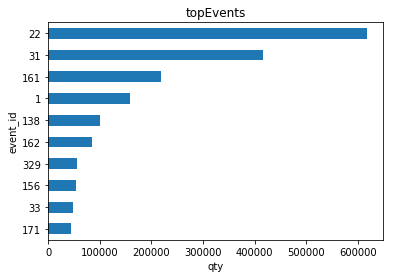

In [29]:
topEvents = events['event_id'].value_counts().head(10).sort_values()
topEventsGr = topEvents.plot('barh')
topEventsGr.set_xlabel('qty')
topEventsGr.set_ylabel('event_id')
topEventsGr.set_title('topEvents')
#events.isnull().sum()
#filter = events['event_id']==22
#df = events.where(filter)

In [15]:
df.sort_values(by=['event_id']).head(5)

,date,event_id,ref_type,ref_hash,application_id,attributed,device_countrycode,device_os_version,device_brand,device_model,...,trans_id,user_agent,event_uuid,carrier,kind,device_os,wifi,connection_type,ip_address,device_language
154,2019-03-08 18:19:40.353,22.0,1.494519e+18,6.848112e+18,41.0,0.0,6.333597e+18,NaN,NaN,2.331947e+18,...,NaN,5.513119e+18,0cc2ce7b-2246-47ff-a793-ca1535812a48,NaN,5.500848e+18,NaN,True,NaN,1.969110e+18,6.535228e+18
1814084,2019-03-09 14:24:22.617,22.0,1.891515e+18,1.331317e+18,10.0,0.0,6.333597e+18,NaN,2.523246e+18,2.082813e+17,...,NaN,5.087978e+18,d602c591-30ed-4961-944f-c059af51ec5d,NaN,5.500848e+18,NaN,True,NaN,3.222900e+18,9.028383e+18
1814085,2019-03-09 14:05:51.853,22.0,1.891515e+18,6.784815e+18,10.0,0.0,6.333597e+18,NaN,2.208835e+18,2.510073e+18,...,NaN,4.823695e+17,2f354832-8795-4115-93e8-011b732271c9,NaN,5.500848e+18,NaN,True,NaN,5.429319e+18,9.028383e+18
1814086,2019-03-09 14:16:30.448,22.0,1.891515e+18,1.759697e+18,10.0,0.0,6.333597e+18,NaN,3.083059e+17,1.148522e+18,...,NaN,2.392611e+18,e45753ac-ab60-4a9c-bbdb-03e67f4c6b5f,NaN,5.500848e+18,NaN,True,NaN,2.796719e+18,9.028383e+18
1814087,2019-03-09 14:44:40.555,22.0,1.891515e+18,2.657902e+18,10.0,0.0,6.333597e+18,NaN,2.208835e+18,7.313748e+18,...,NaN,6.775082e+18,a2255c51-565a-4b65-81da-1d11d1c4816d,NaN,5.500848e+18,NaN,True,NaN,8.262991e+18,9.028383e+18


In [64]:
factor = 100/events.shape[0]
events['event_id'].isnull().sum()*factor

#null 2547
#total 3412
#no null 865

865

In [ ]:
a = installs.dropna(subset=['event_uuid'])
#b = events.dropna(subset=['event_uuid'])
#installs.isnull().sum()
#a.shape
#installs.shape
b = events.head(500000)
merge = pd.merge(a, b, how='inner', on=['event_uuid'])

In [1]:
#merge.loc[:,['event_uuid', 'event_id']]
merge['event_id'].value_counts()
#merge.columns
#merge['event_uuid'].isnull().sum()
#stalls.shape
#installs['event_uuid'].isnull().sum()
#merge['event_uuid'].head(40)
#b['event_uuid'].isnull().sum()

NameError: name 'merge' is not defined

In [ ]:
left = pd.DataFrame({'key1': ['K0', 'K1', 'K2', 'K3'],
                         'A': ['A0', 'A1', 'A2', 'A3'],
                         'B': ['B0', 'B1', 'B2', 'B3']})
    

right = pd.DataFrame({'key1': ['K2', 'K3', float('nan'), float('nan')],
                          'C': ['C0', 'C1', 'C2', 'C3'],
                          'D': ['D0', 'D1', 'D2', 'D3']})
    

result = pd.merge(left, right, how='inner', on=['key1'])

result.head(10)

In [21]:
merge.columns

Index(['advertiser_id', 'action_id', 'source_id', 'created_x', 'country_code',
       'latitude', 'longitude', 'wifi_connection', 'carrier_id', 'trans_id_x',
       'os_minor', 'agent_device', 'os_major', 'specs_brand', 'brand',
       'timeToClick', 'touchX', 'touchY', 'ref_type_x', 'ref_hash',
       'created_y', 'application_id', 'ref_type_y', 'click_hash', 'attributed',
       'implicit', 'device_countrycode', 'device_brand', 'device_model',
       'session_user_agent', 'user_agent', 'event_uuid', 'kind', 'wifi',
       'trans_id_y', 'ip_address', 'device_language'],
      dtype='object')

In [31]:
merge.loc[:,['created_x', 'created_y']]

,created_x,created_y
0,2019-03-09T01:05:04.020Z,2019-03-06 10:27:43.604
1,2019-03-11T13:16:59.223Z,2019-03-08 14:10:39.335
2,2019-03-12T02:14:06.129Z,2019-03-08 14:10:39.335
3,2019-03-11T13:59:56.718Z,2019-03-06 03:30:01.796
4,2019-03-10T10:29:19.742Z,2019-03-10 08:30:15.346
5,2019-03-10T11:39:33.727Z,2019-03-08 00:30:02.714
6,2019-03-13T02:30:21.888Z,2019-03-11 09:38:31.388
7,2019-03-13T19:44:45.440Z,2019-03-06 21:33:40.647
8,2019-03-13T15:46:16.686Z,2019-03-06 21:33:40.647
9,2019-03-13T00:20:51.518Z,2019-03-06 21:33:40.647


In [41]:
filter = events['connection_type']=='Cable/DSL'
events_f = events.where(filter)

Cable/DSL    331948
Name: connection_type, dtype: int64

In [45]:
events_f['connection_type'].isnull().sum()+331948

2494423

In [46]:
events_f['wifi'].isnull().sum()

2494423

Text(0.5, 1.0, 'attributed')

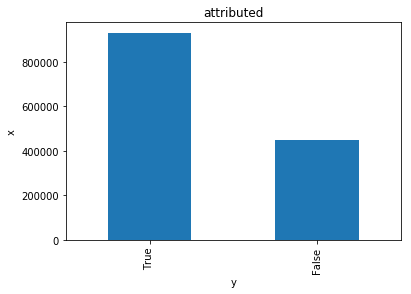

In [11]:
s = events['wifi'].value_counts().plot('bar')
s.set_xlabel('y')
s.set_ylabel('x')
s.set_title('attributed')

In [63]:
someCol = events['attributed']
percent = someCol.where(someCol == False).count()*factor
round(percent,2)

99.8